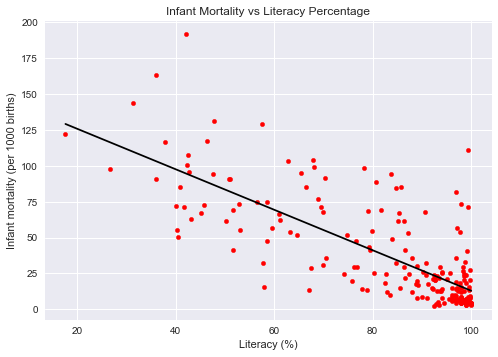

R-Squared: 0.586045081941
P Value: 3.96082462721e-41


In [3]:
# Exploring possible correlation between literacy percentages and infant mortality
# Null Hypothesis : There is no correlation

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

countries = pd.read_csv('countrydata\countryData.csv') # importing data into dataframe
#countries.head()
countriesPL = countries[['Country','Infant mortality (per 1000 births)','Literacy (%)']] # selecting columns of interest
countriesPL = countriesPL.apply(lambda x: x.str.replace(',','.')) # replace commas with decimal places in data
countriesPL[['Infant mortality (per 1000 births)','Literacy (%)']] = countriesPL[['Infant mortality (per 1000 births)','Literacy (%)']].apply(pd.to_numeric, errors='coerce') #convert to numeric
countriesPL.head()
countriesPL.describe()
countriesPL.plot.scatter('Literacy (%)','Infant mortality (per 1000 births)',color='r')
plt.title('Infant Mortality vs Literacy Percentage')

x_vals = countriesPL['Literacy (%)']
y_vals = countriesPL['Infant mortality (per 1000 births)']

mask = ~np.isnan(x_vals) & ~np.isnan(y_vals) # masking nan values
slope, intercept, r_value, p_value, std_err = stats.linregress(x_vals[mask], y_vals[mask]) # regression analysis

xTh = np.array([x_vals.min(),x_vals.max()])
yTh = slope*xTh + intercept

plt.plot(xTh,yTh,color='k')
plt.show()

print('R-Squared: ' + str(r_value**2))
print('P Value: ' + str(p_value))



